<a href="https://colab.research.google.com/github/harnalashok/Clustering/blob/master/uber_trips_clusters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""
Last amended: 25th March, 2021
My folder: D:\data\OneDrive\Documents\uber
           /home/ashok/Documents/4.clustering
           
DataSource:
             https://github.com/fivethirtyeight/uber-tlc-foil-response/tree/master/uber-trip-data   
             https://github.com/caroljmcdonald/spark-ml-kmeans-uber  
                   

Ref: knuggets 
    https://www.kdnuggets.com/2020/07/clustering-rideshare-data-uber.html
Ref: Using pyspark
    https://github.com/mutukulasureshkumar/K-Means_Clustering_PySpark

Objectives: Use Uber data to perform clustering
            and advise Uber of possible locations to
            use as hub for taxis
"""


# Problem
Uber Technologies Inc. is a peer-to-peer ride sharing platform. Uber's platform connects the drivers who can drive to a customer's location. Uber uses machine learning, for calculating pricing to finding the optimal positioning of cars to maximizing profits. We have used the public Uber trip dataset to discuss building a real-time example for analysis and monitoring of car GPS data.

The Uber trip dataset contains data generated by Uber from New York City. The data is freely available on [FiveThirtyEight](https://data.fivethirtyeight.com/).

### Software install & Call libraries

In [3]:
# 0.0 Let therebe display from multiple commands
#     from a jupyter cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [15]:
# 0.1 Should be 1.3
import yellowbrick
yellowbrick.__version__  

# 0.2 Should be 0.12.1
import folium
folium.__version__

'1.3'

'0.12.1'

In [ ]:
# 0.3
!pip install yellowbrick==1.3
!pip install folium==0.12.1

In [16]:
# 1.0 Call libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# 1.1 Visualization
import matplotlib.pyplot as plt
# conda install -c conda-forge folium
import folium
# conda install -c districtdatalabs yellowbrick
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import silhouette_visualizer
# 1.2
import os,time


In [17]:
# 1.3 Check
import yellowbrick
yellowbrick.__version__  

# 1.3.1
import folium
folium.__version__

'1.3'

'0.12.1'

In [18]:
# 1.4 Connect to your google drive
#     Transfer rossmann files from 
#     gdrive to colab VM

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
# 2.0 Read data
pathToFile = "D:\\data\\OneDrive\\Documents\\uber\\"
pathToFile = "C:\\Users\\ashok\\OneDrive\\Documents\\uber\\"
pathToFile = "/content/drive/MyDrive/Colab_data_files/uber/"
#pathToFile = "/home/ashok/datasets/uber/"
os.chdir(pathToFile)

### Read data

In [20]:
# 2.1 Read data
#data = pd.read_csv(pathToFile + "uber.zip", names = ["dtime","lat","long","base"])
data = pd.read_csv(pathToFile + "uber_raw_data_apr_sep2014.csv.zip", names =["dtime","lat","long","base"])
data.shape    # (45,34,327, 4)
data.head()
data.dtypes

(4534327, 4)

,dtime,lat,long,base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


dtime     object
lat      float64
long     float64
base      object
dtype: object

The dataset has 45 lakh observations and four columns. It has four attributes:

> **Date/Time:** The date and time of the Uber pickup.<br>
**Lat(Latitude)**: The latitude of the Uber pickup<br>
**Lon(Longitude)**: The longitude of the Uber pickup.<br>
**Base**: the TLC base company code affiliated with the Uber pickup. <br>

### Decide number of clusters

In [21]:
# 2.2 What should be the number of clusters
clus = data[["lat","long"]]

# 2.2.1 IF your RAM is large, take
#       ,say, first 10000 rows
clus = clus[:]     # clus = clus[:100000]

In [22]:
# 2.3 What should be the number of clusters
inertia = []
s_score = []
start = time.time()

# 2.4
for i in range(2,10):
    # 2.4.1 The model
    model = KMeans(n_clusters = i, max_iter = 300)
    model.fit(clus)     
    # 2.4.2 Store inertia value
    inertia.append(model.inertia_)
    # 2.4.3 Calculate silhoutte score
    t=silhouette_score(clus.values, model.labels_, sample_size = 10000)
    s_score.append(t)
    print()

end = time.time()
(end-start)/60    # 7minutes

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=9, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

6.7754887302716575

#### Scree plot and Silhoutte score

[13680.548927296139,
 10670.323819206276,
 8639.06586186966,
 6770.21786716257,
 5527.835411483697,
 4608.441887550706,
 4024.888530993356,
 3577.49249758549]

<Figure size 432x288 with 0 Axes>

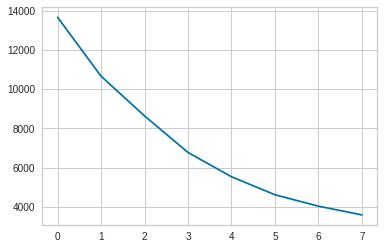

In [23]:
# 2.5 Values of inertia
inertia
# 2.6 Elbow plot
plt.figure()
plt.plot(inertia)
plt.show()

[0.708788536928392,
 0.380281598154007,
 0.3953513939815527,
 0.40647307972504687,
 0.44330161324971334,
 0.446192601917853,
 0.4556126065931383,
 0.4141431834271245]

<Figure size 432x288 with 0 Axes>

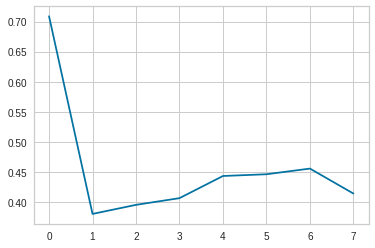

In [24]:
# 2.7 Values of silhoutte score
s_score
# 2.8 Silhoutte score plot
plt.figure()
plt.plot(s_score)
plt.show()

In [ ]:
"""
From the above elbow plot, we can see that 
the sum of the squared distance of the 
observations from their closest cluster 
centroid keeps decreasing with an increase 
in the number of clusters. We can see that 
after K=6 there is a significant reduction. 
We can choose either 6 or 7 clusters, and for 
this application we have chosen 6.

"""

### Final model

In [25]:
# 3.1 Perform clustering with 6 clusters
model = KMeans(
                n_clusters = 6,
                max_iter = 300
               )

# 3.1.1
start = time.time()
model.fit(clus)
end = time.time()
(end-start)/60

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

0.7353662331899007

In [36]:
# 3.2 Create a new column
clus['Clusters'] = model.labels_

In [27]:
# 3.3 Mean silhoutte score
silhouette_score(clus.values, model.labels_, sample_size=10000)

0.4441311828913886

#### Silhoutte plot

In [28]:
# 4.0
# Ref: https://www.scikit-yb.org/en/latest/api/cluster/silhouette.html

visualizer = SilhouetteVisualizer(
                                  model,
                                  colors='yellowbrick'
                                  )

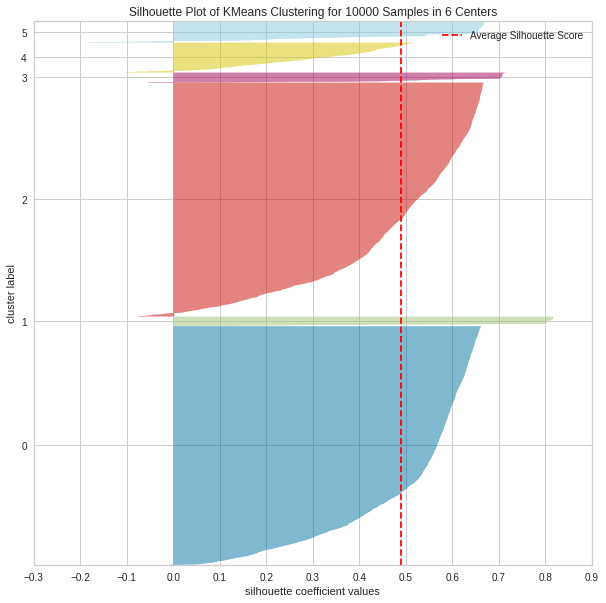

0.06302735805511475

In [29]:
# 4.1
fig = plt.figure(figsize= (10,10))
start = time.time()
_= visualizer.fit(clus[:10000])        # Fit the data to the visualizer
_= visualizer.show()        # Finalize and render the figure
end = time.time()
(end-start)/60


#### Cluster centroids on map

In [30]:
# 5.0
centroids = model.cluster_centers_

# 5.1 Transform  centroids to a DataFrame
clocation = pd.DataFrame(
                         centroids,
                         columns = ["Latitude", "Longitude"]
                         )

# 5.1.1
clocation

,Latitude,Longitude
0,40.766397,-73.972165
1,40.665432,-73.762527
2,40.731292,-73.998091
3,40.698366,-74.202576
4,40.687489,-73.964222
5,40.796745,-73.873249


In [31]:
# 5.2 What are mean centroid values
lat_mean = clocation['Latitude'].mean()
long_mean = clocation['Longitude'].mean()

In [32]:
# 5.3 Converting centroid into lists
centroid = clocation.values.tolist()

# 5.1 Plotting the centroids on google map using Folium library.
map = folium.Map(
                  # Center the map here
                  location=[lat_mean,long_mean],
                  zoom_start = 10
                )

# 5.2 
for point in range(0, len(centroid)):
    abc=folium.Marker(
                      centroid[point],
                      popup = centroid[point]
                      ).add_to(map)

    

In [33]:
# 5.3 Draw google map
map

#### Conclusions

We can see that all the six centroids have been plotted on the map. How are these centroids helpful for Uber?

>    Uber can use these centroids as their hubs. Whenever Uber receives a new ride request, they can check the closeness with each of these centroids. Whichever particular centroid is closer, Uber can direct the vehicle from that particular location to the customer location.<br>

>    Uber has many drivers and provides services to many locations. If Uber knows the hub (particular centroid), and if they are getting a lot of ride request then strategically they can place their drivers in better locations wherein their probability of getting a ride request is greater. This will help Uber to serve the customer faster as vehicles are placed closer to the location and also help to grow their business.<br>

>   Uber can make use of these centroids for the optimal placing of their vehicles. They can find which centroid at which part of the day have more ride requests. For example, if Uber gets more request from centroid 0 (cluster 1) at 11 AM, but far fewer requests from centroid 3 (cluster 4), then they can redirect the vehicles to cluster 1 from cluster 4 (if there is an increased vehicle presence in cluster 4).<br>

>   Uber can use these centroids for optimal pricing by analyzing which cluster deals with maximum requests, peak times etc. Suppose they don’t have many vehicles available to be sent to a particular location (more demand), then they can do optimal pricing as demand is high and supply is less. <br>

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3747: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


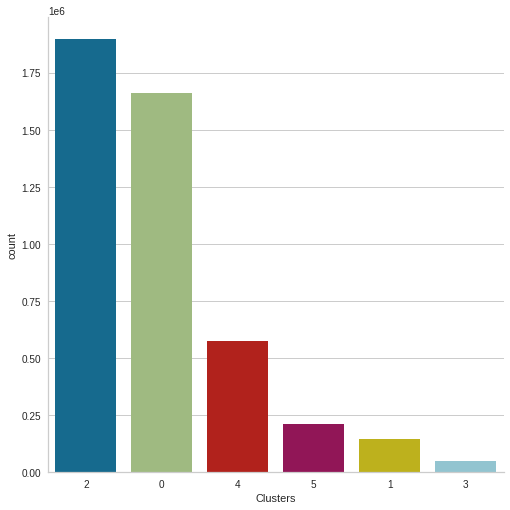

In [45]:
# https://seaborn.pydata.org/generated/seaborn.catplot.html
_= sns.catplot(
                   data = clus,
                   x = 'Clusters',
                   kind = 'count',
                   size = 7,
                   order = [2,0,4,5,1,3] # Order of display
                  )

In [ ]:
# 3.0 Predicting on a new location
new_location = [(40.6556,-73.5631)]
kmeans.predict(new_location)

In [ ]:
####### I am done ################